## Maciej Kapitan

# Road Sign Recognition system


#### Motivation
Artificial intelligence is finding increasing applications in various fields. One of its popular applications is assisting in vehicle operation, which can be done in various ways. My project describes a system for recognizing road signs – such a program can assist the driver by displaying current speed limits (read from road signs) or serve as a component of so-called self-driving cars.

#### System Assumptions
The system's task is to capture the current image from a camera attached to the car – it can be a car camera or simply a properly attached smartphone camera. It then processes the video image to extract road signs and recognize them using a neural network.

#### Specification:
The project consists of the following elements:

- Neural network model
Program capturing the camera image
The neural network model was created using the TensorFlow library in Python. Training data is located in the ./NewDataset/NewDataset/Train folder and contains images of various road signs divided into several categories. The dataset is sourced from kaggle.com. These images are processed into matrices and then used as input for the neural network, which outputs the category to which a given road sign belongs. Details of the model's operation and code are provided in this document below.

- The program capturing road signs is responsible for capturing the image from the camera and processing it to find road signs and recognize their category, using a pre-trained and saved model. Image processing occurs in the following steps:

- Blurring the image using the Gauss method – this allows removing unnecessary details from the image for more precise extraction of relevant fragments.
- Applying the Canny filter – the Canny filter extracts edges from the image, resulting in a black and white image displaying only contours, making shape detection easier.
- Finding different geometric shapes – road signs are typically simple geometric shapes (circles, triangles, etc.), allowing the use of methods provided by the OpenCV library to extract image fragments containing road signs – the Hough transformation is used for circle detection, and the findContours method for polygons.
- Cropping the image fragment containing the sign and predicting its category using the neural network model.

#### Results
The program performs well in recognizing road signs – the neural network model's accuracy is very high, reaching almost 98% on the validation set. Image processing from the camera also works correctly, as evident in the image below. However, the dataset I used did not cover all possibilities, so for the program to be deployed for general use, much more data and extensive testing on various video files are needed.

#### Summary
In conclusion, I believe that artificial intelligence systems can support drivers' work and even replace them in the future. However, it is crucial to remember that such systems must exhibit very high reliability, requiring many hours of work from programmers and testers.

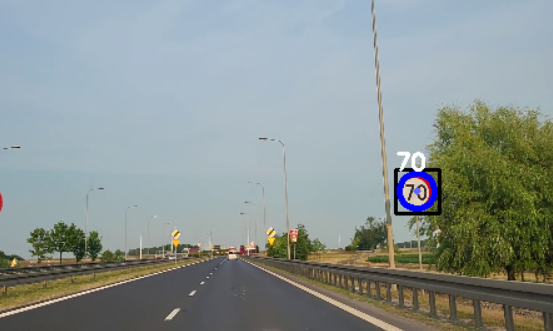

### Uploading Images

In [1]:
import glob
import ipyplot

images = { 
'img_30': glob.glob('./NewDataset/NewDataset/Train/30SpeedLimit/*.png', recursive=True),
'img_50': glob.glob('./NewDataset/NewDataset/Train/50SpeedLimit/*.png', recursive=True),
'img_70': glob.glob('./NewDataset/NewDataset/Train/70SpeedLimit/*.png', recursive=True),
'img_bumper': glob.glob('./NewDataset/NewDataset/Train/70SpeedLimit/*.png', recursive=True),
'img_AccessDenied': glob.glob('./NewDataset/NewDataset/Train/AccessDenied/*.png', recursive=True),
'img_Bumper': glob.glob('./NewDataset/NewDataset/Train/Bumper/*.png', recursive=True),
'img_CloseRoad': glob.glob('./NewDataset/NewDataset/Train/CloseRoad/*.png', recursive=True),
'img_LeftSign': glob.glob('./NewDataset/NewDataset/Train/LeftSign/*.png', recursive=True),
'img_OneWayRoad': glob.glob('./NewDataset/NewDataset/Train/OneWayRoad/*.png', recursive=True),
'img_Parking': glob.glob('./NewDataset/NewDataset/Train/Parking/*.png', recursive=True),
'img_PedestrianCrossWalk': glob.glob('./NewDataset/NewDataset/Train/PedestrianCrossWalk/*.png', recursive=True),
'img_RightSign': glob.glob('./NewDataset/NewDataset/Train/RightSign/*.png', recursive=True),
'img_Roundabout': glob.glob('./NewDataset/NewDataset/Train/Roundabout/*.png', recursive=True),
'img_Stop': glob.glob('./NewDataset/NewDataset/Train/Stop/*.png', recursive=True),
'img_Uneven': glob.glob('./NewDataset/NewDataset/Train/Uneven/*.png', recursive=True),
'img_Yield': glob.glob('./NewDataset/NewDataset/Train/Yield/*.png', recursive=True),
'img_other': glob.glob('./NewDataset/NewDataset/Train/other/*.png', recursive=True)
}

ipyplot.plot_images(images['img_30'], max_images=5, img_width=150)
ipyplot.plot_images(images['img_50'], max_images=5, img_width=150)
ipyplot.plot_images(images['img_70'], max_images=5, img_width=150)
ipyplot.plot_images(images['img_bumper'], max_images=5, img_width=150)
ipyplot.plot_images(images['img_AccessDenied'], max_images=5, img_width=150)
ipyplot.plot_images(images['img_Bumper'], max_images=5, img_width=150)
ipyplot.plot_images(images['img_CloseRoad'], max_images=5, img_width=150)
ipyplot.plot_images(images['img_other'], max_images=5, img_width=150)

### Preprocessing images

In [2]:
import cv2

categories = {
    '30': [],
    '50': [],
    '70': [],
    'AccessDenied': [],
    'Bumper': [],
    'CloseRoad': [],
    'LeftSign': [],
    'OneWayRoad': [],
    'Parking': [],
    'PedestrianCrossWalk': [],
    'RightSign': [],
    'Roundabout': [],
    'Stop': [],
    'Uneven': [],
    'Yield': [],
    'other': []
}


for category in categories:
    img_paths = images[f'img_{category}']
    for img in img_paths:
        img = cv2.imread(img, cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #th, img = cv2.threshold(img, 128, 255, cv2.THRESH_OTSU)
        img = cv2.resize(img, (50, 50), interpolation = cv2.INTER_LINEAR)
        categories[category].append([img, category])

In [3]:
import numpy as np

dataset = np.concatenate(tuple(categories.values()))

np.random.shuffle(dataset)
X = []
y = []

for feature, label in dataset:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print(X.shape)

(16473, 50, 50)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [19]:
X = X.reshape((*X.shape, 1))
X.shape

(16473, 50, 50, 1)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, stratify=y)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

transformer = ColumnTransformer(transformers=[('cat', OneHotEncoder(), [0])], remainder='passthrough')
Y_train = transformer.fit_transform(Y_train.reshape(-1,1)).toarray()
Y_test = transformer.fit_transform(Y_test.reshape(-1,1)).toarray()

print(Y_train.shape)

(11531, 16)


In [12]:
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf

### Neural net model

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(50, 50, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(16, activation='softmax'))

In [27]:
model.compile(Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics = ['accuracy'] )

In [28]:
history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 15, batch_size = 560)

Epoch 1/15
21/21 [==============================] - 23s 1s/step - loss: 1.3987 - accuracy: 0.5973 - val_loss: 12.6946 - val_accuracy: 0.3231
Epoch 2/15
21/21 [==============================] - 22s 1s/step - loss: 0.2755 - accuracy: 0.9106 - val_loss: 1.7880 - val_accuracy: 0.6594
Epoch 3/15
21/21 [==============================] - 22s 1s/step - loss: 0.1159 - accuracy: 0.9632 - val_loss: 1.2234 - val_accuracy: 0.7335
Epoch 4/15
21/21 [==============================] - 22s 1s/step - loss: 0.0748 - accuracy: 0.9753 - val_loss: 0.3937 - val_accuracy: 0.8861
Epoch 5/15
21/21 [==============================] - 22s 1s/step - loss: 0.0568 - accuracy: 0.9817 - val_loss: 0.1617 - val_accuracy: 0.9551
Epoch 6/15
21/21 [==============================] - 22s 1s/step - loss: 0.0338 - accuracy: 0.9886 - val_loss: 0.1284 - val_accuracy: 0.9609
Epoch 7/15
21/21 [==============================] - 22s 1s/step - loss: 0.0281 - accuracy: 0.9908 - val_loss: 0.1101 - val_accuracy: 0.9678
Epoch 8/15
21/21 [=

### Confusion matrix for train and test set

361/361 [==============================] - 7s 19ms/step


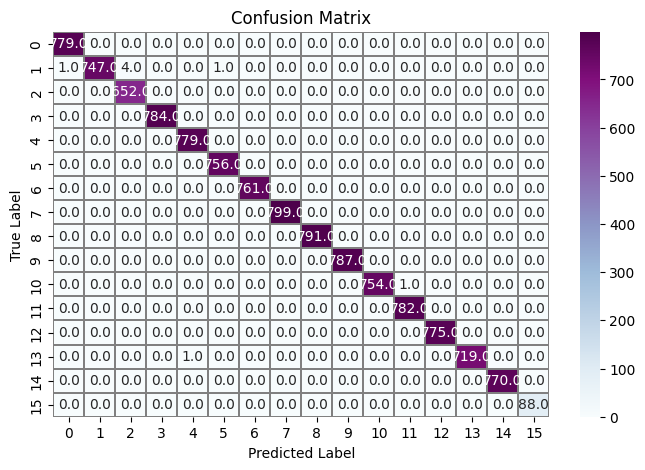

155/155 [==============================] - 3s 18ms/step


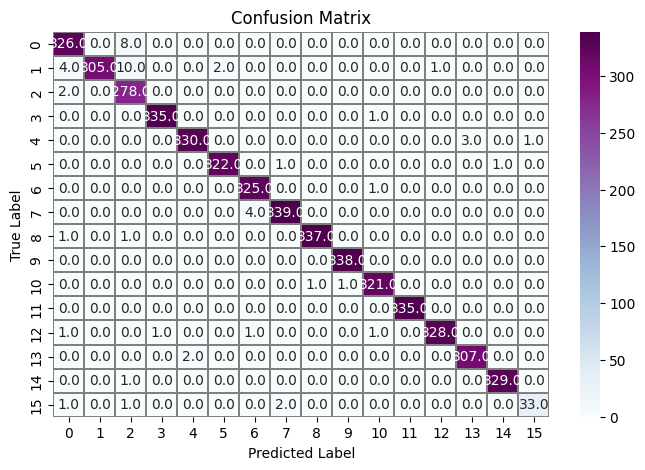

In [29]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns



def plot_cm(testset, labels):
    model.evaluate(testset, labels)
    Y_pred = model.predict(testset)
    Y_pred_classes = np.argmax(Y_pred,axis = 1) 
    Y_true = np.argmax(labels,axis = 1) 
    confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
    f,ax = plt.subplots(figsize=(8,5))
    sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    
    
plot_cm(X_train, Y_train)
plot_cm(X_test, Y_test)

In [30]:
model.save("road_sign_model")

INFO:tensorflow:Assets written to: road_sign_model\assets


INFO:tensorflow:Assets written to: road_sign_model\assets
